- - - -
# Symbolic Differential Equation Tutorial


- - - -

Martin Veillette @ Berea College

- - - -

## Solving a second order differential equation symbolically with python 

Solve the differential equation associated with a dampened harmonic oscillator

$$ m \frac{d^2 x}{dt^2} = - k x - c m \frac{dx}{dt} $$

The 25.0 kg mass is attached to a spring constant of 50.0 N/m and damping coefficient of 0.5 s$^{-1}$. The mass is release from rest at distance of 1.2 m from the equilibrium point.

In [1]:
# setup 
from sympy import Eq, pi
import sympy as sp
import matplotlib.pyplot as plt
from numpy import linspace
sp.init_printing(use_latex='mathjax')
get_ipython().magic('matplotlib inline') # inline plotting

In [2]:
t,k,m,c = sp.symbols('t,k,m,c')
x = sp.Function('x') # (t)

In [3]:
# parameter values

k_ = 50.0  # spring constant, N/m
m_ = 25.0 # mass, Kg
c_ = 0.5  # damping coefficient, 1/s

In [4]:
ode = k*x(t) + m * c * x(t).diff(t,1) + m*x(t).diff(t,2)
Eq(ode)

                            2          
    d                      d           
c⋅m⋅──(x(t)) + k⋅x(t) + m⋅───(x(t)) = 0
    dt                      2          
                          dt           

In [5]:
ode_sol = sp.dsolve(ode)
ode_sol

             ⎛        ________________⎞         ⎛        ________________⎞
             ⎜       ╱   ⎛ 2        ⎞ ⎟         ⎜       ╱   ⎛ 2        ⎞ ⎟
             ⎜     ╲╱  m⋅⎝c ⋅m - 4⋅k⎠ ⎟         ⎜     ╲╱  m⋅⎝c ⋅m - 4⋅k⎠ ⎟
           t⋅⎜-c - ───────────────────⎟       t⋅⎜-c + ───────────────────⎟
             ⎝              m         ⎠         ⎝              m         ⎠
           ────────────────────────────       ────────────────────────────
                        2                                  2              
x(t) = C₁⋅ℯ                             + C₂⋅ℯ                            

In [6]:
# initial conditions
x0 = 1.2 # in meter
v0 = 0.0 # in m/s

# initial condition equations
bc1 = Eq(x0, ode_sol.rhs.subs(t,0))
bc2 = Eq(v0, ode_sol.rhs.diff(t).subs(t,0))

C_eq = {bc1,bc2}
C_eq

   ⎛⎡         ⎛         ________________⎞      ⎛         ________________⎞    
   ⎜⎢         ⎜        ╱   ⎛ 2        ⎞ ⎟      ⎜        ╱   ⎛ 2        ⎞ ⎟    
   ⎜⎢         ⎜  c   ╲╱  m⋅⎝c ⋅m - 4⋅k⎠ ⎟      ⎜  c   ╲╱  m⋅⎝c ⋅m - 4⋅k⎠ ⎟    
set⎜⎢0.0 = C₁⋅⎜- ─ - ───────────────────⎟ + C₂⋅⎜- ─ + ───────────────────⎟, 1.
   ⎝⎣         ⎝  2           2⋅m        ⎠      ⎝  2           2⋅m        ⎠    

           ⎤⎞
           ⎥⎟
           ⎥⎟
2 = C₁ + C₂⎥⎟
           ⎦⎠

In [7]:
known_params = {m,c,k,t}
const = ode_sol.free_symbols - known_params
const

set([C₁, C₂])

In [8]:
Csol = sp.solve(C_eq,const)
Csol

⎧            0.6⋅c⋅m                         0.6⋅c⋅m             ⎫
⎪C₁: - ──────────────────── + 0.6, C₂: ──────────────────── + 0.6⎪
⎨         _________________               _________________      ⎬
⎪        ╱  2  2                         ╱  2  2                 ⎪
⎩      ╲╱  c ⋅m  - 4.0⋅k⋅m             ╲╱  c ⋅m  - 4.0⋅k⋅m       ⎭

In [9]:
# substitute back the found solution for C1 and C2 in the differential equation
ode_sol = ode_sol.subs(Csol)
ode_sol

                                         ⎛        ________________⎞           
                                         ⎜       ╱   ⎛ 2        ⎞ ⎟           
                                         ⎜     ╲╱  m⋅⎝c ⋅m - 4⋅k⎠ ⎟           
                                       t⋅⎜-c - ───────────────────⎟           
                                         ⎝              m         ⎠           
                                       ────────────────────────────           
       ⎛        0.6⋅c⋅m             ⎞               2                 ⎛      0
x(t) = ⎜- ──────────────────── + 0.6⎟⋅ℯ                             + ⎜───────
       ⎜     _________________      ⎟                                 ⎜   ____
       ⎜    ╱  2  2                 ⎟                                 ⎜  ╱  2 
       ⎝  ╲╱  c ⋅m  - 4.0⋅k⋅m       ⎠                                 ⎝╲╱  c ⋅

                        ⎛        ________________⎞
                        ⎜       ╱   ⎛ 2        ⎞ ⎟
                        ⎜   

In [10]:
# use the values for constants of m, k and c 
ode_sol = ode_sol.subs({m:m_, c:c_, k:k_})
ode_sol

                                    t⋅(-0.5 - 2.78388218141501⋅ⅈ)             
                                    ─────────────────────────────             
                                                  2                           
x(t) = (0.6 + 0.107763181216065⋅ⅈ)⋅ℯ                              + (0.6 - 0.1

                   t⋅(-0.5 + 2.78388218141501⋅ⅈ)
                   ─────────────────────────────
                                 2              
07763181216065⋅ⅈ)⋅ℯ                             

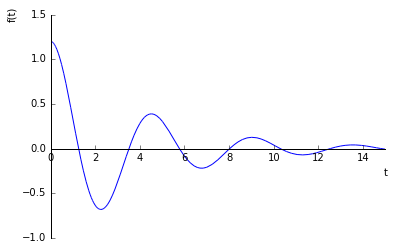

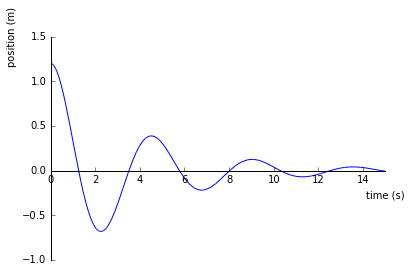

In [18]:
# plot the position as a function of time
t = sp.symbols('t')
myPlot = sp.plot(ode_sol.rhs,(t,0,15));

myPlot.ylabel = 'position (m)';
myPlot.xlabel = 'time (s)';
myPlot.show();

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


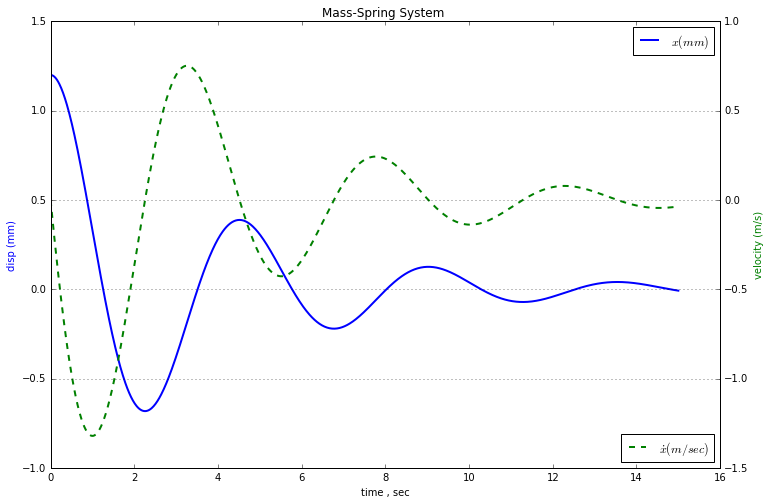

In [19]:
# another approach to plot

xfun = sp.lambdify(t,ode_sol.rhs, "numpy")
vfun = sp.lambdify(t,sp.diff(ode_sol.rhs), "numpy")

t = linspace(0,15,1000)

fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx()
ax1.plot(t,xfun(t),'b',label = r'$x (mm)$', linewidth=2.0)
ax2.plot(t,vfun(t),'g--',label = r'$\dot{x} (m/sec)$', linewidth=2.0)
ax2.legend(loc='lower right')
ax1.legend()
ax1.set_xlabel('time , sec')
ax1.set_ylabel('disp (mm)',color='b')
ax2.set_ylabel('velocity (m/s)',color='g')
plt.title('Mass-Spring System ')
plt.grid()
plt.show()